In [69]:
import numpy as np
import pandas as pd
import scipy.linalg as la
from sklearn.decomposition import PCA


In [70]:
dataset = pd.DataFrame( pd.read_csv("datas.csv"))

In [71]:

dataset.shape

(5, 3)

In [72]:
dataset

,Maths,English,History
0,90,60,90
1,90,90,30
2,60,60,60
3,60,60,90
4,30,30,30


In [76]:
X = dataset.iloc[:, :2].values #given marks
y = dataset.iloc[:, 2].values  #predicting history

In [77]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0) 


In [78]:
X_test.shape

(2, 2)

In [41]:
mean = X.mean(axis=0)

In [42]:
X= X -mean

In [43]:
dataset

,Maths,English,History
0,24.0,0.0,30.0
1,24.0,30.0,-30.0
2,-6.0,0.0,0.0
3,-6.0,0.0,30.0
4,-36.0,-30.0,-30.0


In [44]:
def cov1(a, b): 
#     print("hello")
    if len(a) != len(b): 
#         print("here")
        return 
    a_mean = np.mean(a) 
    b_mean = np.mean(b) 
    sum = 0 
    for i in range(0, len(a)): 
        sum += ((a[i] - a_mean) * (b[i] - b_mean)) 
    return sum/(len(a)-1)

def calc_cov(A):
#     print(A[0])
    N,M = A.shape
    n=0;
    ret = np.reshape(np.zeros(M*M),(M,M))
#     print(ret)
    for m in range(0,M):
        for j in range(0,M):
#             print(m,j)
#             print(A.iloc[:,j].values)
            ret[m][j] = cov1(A.iloc[:,m],A.iloc[:,j])
#             print(ret[n][m])
    return ret;
        

In [45]:
ret = calc_cov(dataset)

In [46]:
ret

array([[630., 450., 225.],
       [450., 450.,   0.],
       [225.,   0., 900.]])

In [47]:
V = np.cov(dataset.T)
print(V)

[[630. 450. 225.]
 [450. 450.   0.]
 [225.   0. 900.]]


In [48]:
results = la.eig(ret)


In [49]:
eigenValues, eigenVectors = np.linalg.eig(ret)


In [50]:

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(ret)

for i in range(len(eig_val_cov)):
   
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
#     assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

Eigenvector 1: 
[[ 0.6487899 ]
 [-0.74104991]
 [-0.17296443]]
Eigenvalue 1 from covariance matrix: 56.02457535329836
----------------------------------------
Eigenvector 2: 
[[-0.65580225]
 [-0.4291978 ]
 [-0.62105769]]
Eigenvalue 2 from covariance matrix: 1137.5874413012948
----------------------------------------
Eigenvector 3: 
[[-0.3859988 ]
 [-0.51636642]
 [ 0.7644414 ]]
Eigenvalue 3 from covariance matrix: 786.3879833454065
----------------------------------------


In [51]:
#sort eig_pairs
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
print(eig_pairs)
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print(eig_pairs[2][1])

[(56.02457535329836, array([ 0.6487899 , -0.74104991, -0.17296443])), (1137.5874413012948, array([-0.65580225, -0.4291978 , -0.62105769])), (786.3879833454065, array([-0.3859988 , -0.51636642,  0.7644414 ]))]
[ 0.6487899  -0.74104991 -0.17296443]


In [52]:
results[1]

array([[ 0.6487899 , -0.65580225, -0.3859988 ],
       [-0.74104991, -0.4291978 , -0.51636642],
       [-0.17296443, -0.62105769,  0.7644414 ]])

In [53]:
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]


In [54]:

eigenVectors

array([[-0.65580225, -0.3859988 ,  0.6487899 ],
       [-0.4291978 , -0.51636642, -0.74104991],
       [-0.62105769,  0.7644414 , -0.17296443]])

In [55]:
P = eigenVectors.T.dot(dataset.T)


In [63]:
print(P.T[:,:2])
dataset1 = P.T[:,:2]

[[-34.37098481  13.66927088]
 [ -9.98345733 -47.68820559]
 [  3.93481353   2.31599277]
 [-14.69691716  25.24923474]
 [ 55.11654576   6.45370719]]


In [65]:
pca = PCA(2)
pca.fit(dataset)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.65580225 -0.4291978  -0.62105769]
 [ 0.3859988   0.51636642 -0.7644414 ]]
[1137.5874413   786.38798335]


In [67]:
B = pca.transform(dataset)
print(B)

[[-34.37098481 -13.66927088]
 [ -9.98345733  47.68820559]
 [  3.93481353  -2.31599277]
 [-14.69691716 -25.24923474]
 [ 55.11654576  -6.45370719]]


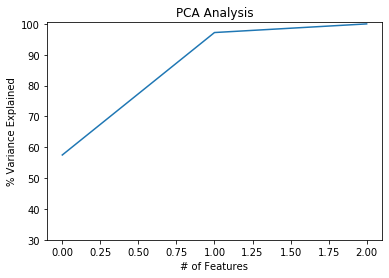

In [32]:
#howmany features to pick
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.preprocessing import scale

import seaborn as sb

pca.fit(dataset)
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [ ]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X = dataset.iloc[:, 1:7].values #given marks
y = dataset.iloc[:, 7].values  #predicting history
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0) 
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
